In [44]:
import os
from pathlib import Path

import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from time import time 

from skimage.measure import label, regionprops, regionprops_table

from collections import defaultdict

In [87]:
data_dir = Path('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original')
data_files = list(data_dir.iterdir())

IMAGE_HEIGHT, IMAGE_WIDTH = 1209, 941

In [84]:
def get_data(year, data_files):
    feature_file = None
    target_file = None
    for f in data_files:
        f_str = f.as_posix()
        if(('CD' in f_str) and (str(year) in f_str)):
            feature_file = f
        if(('TD' in f_str) and (str(year) in f_str)):
            target_file = f

    return feature_file, target_file        

def load_data(years, data_files):
    dfs = []
    for year in years:
        feature_file, target_file = get_data(year=year, data_files=data_files)
        print(year, feature_file, target_file)
        X = pd.read_csv(feature_file)
        y = pd.read_csv(target_file)
        dfs.append(X.merge(y, how='inner'))
    
    return pd.concat(dfs)

In [85]:
def reshape(df, feature='value') -> np.ndarray:
    df_feature = df[feature].to_numpy()
    x = np.reshape(df_feature, (IMAGE_HEIGHT, IMAGE_WIDTH))
    return x 

In [89]:
all_df = dict()

for year in np.arange(2003, 2018):
    df = load_data([year], data_files)
    all_df[year] = df

2003 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2003_2003.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2003_2003.csv
2004 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2004_2004.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2004_2004.csv
2005 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2005_2005.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2005_2005.csv
2006 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2006_2006.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2006_2006.csv
2007 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2007_2007.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2007_2007.csv
2008 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2008_2008.csv /home/capstone22/WildFIrePrediction/isaac_data

In [98]:
all_df[2003].columns

Index(['pixel_id', 'pixel_id.1', 'Road_Dist', 'Elec_Dist', 'Cultivated_Prop',
       'Elev', 'time_Normal', 'aet__count_above_mean_Normal',
       'aet__count_below_mean_Normal', 'aet__first_location_of_maximum_Normal',
       'aet__last_location_of_maximum_Normal',
       'aet__longest_strike_above_mean_Normal',
       'aet__longest_strike_below_mean_Normal', 'aet__maximum_Normal',
       'aet__mean_Normal', 'aet__minimum_Normal',
       'aet__quantile__q_0.1_Normal', 'aet__quantile__q_0.5_Normal',
       'aet__quantile__q_0.9_Normal', 'aet__skewness_Normal',
       'aet__standard_deviation_Normal', 'cwd__count_above_mean_Normal',
       'cwd__count_below_mean_Normal', 'cwd__first_location_of_maximum_Normal',
       'cwd__last_location_of_maximum_Normal',
       'cwd__longest_strike_above_mean_Normal',
       'cwd__longest_strike_below_mean_Normal', 'cwd__maximum_Normal',
       'cwd__mean_Normal', 'cwd__minimum_Normal',
       'cwd__quantile__q_0.1_Normal', 'cwd__quantile__q_0.5_Norm

In [99]:
def create_x_col(row):
    return row['pixel_id'] // IMAGE_WIDTH

def create_y_col(row):
    return row['pixel_id'] % IMAGE_WIDTH

In [101]:
# add x, y columns
for year, df in all_df.items():
    df['x'] = df['pixel_id'] // IMAGE_WIDTH
    df['y'] = df['pixel_id'] % IMAGE_WIDTH

In [103]:
# for year, img in dataframes.items():
#     plt.imshow(img, vmin=0, vmax=1)
#     plt.title(str(year))
#     plt.show()

In [45]:
all_areas = defaultdict(list)
all_coords = defaultdict(list)

for year, df in all_df.items():
    
    
    label_img = label(img)
    regions = regionprops(label_img)
    
    for prop in regions:
        area = prop.area
        if area > 200:
            all_areas[year].append(area)
            all_coords[year].append(prop.coords)

In [46]:
all_areas

defaultdict(list,
            {2003: [290, 435, 622, 229, 1103],
             2005: [260],
             2006: [401, 658, 342],
             2007: [360, 976, 233, 834, 362],
             2008: [831, 517, 345, 201, 971],
             2009: [397, 648],
             2012: [376, 1281, 314],
             2013: [1032],
             2014: [542, 395],
             2015: [318, 379, 306, 286, 613],
             2016: [522],
             2017: [368, 266, 345, 205, 224, 332, 243, 1144]})

In [116]:
all_coords[2003]

[array([[974, 482],
        [975, 481],
        [975, 482],
        [975, 483],
        [976, 473],
        [976, 477],
        [976, 481],
        [976, 482],
        [976, 483],
        [977, 473],
        [977, 474],
        [977, 475],
        [977, 476],
        [977, 477],
        [977, 480],
        [977, 481],
        [977, 482],
        [977, 483],
        [977, 484],
        [978, 474],
        [978, 475],
        [978, 476],
        [978, 477],
        [978, 478],
        [978, 479],
        [978, 480],
        [978, 481],
        [978, 482],
        [978, 483],
        [978, 484],
        [979, 473],
        [979, 474],
        [979, 475],
        [979, 476],
        [979, 477],
        [979, 478],
        [979, 479],
        [979, 480],
        [979, 481],
        [979, 482],
        [979, 483],
        [979, 484],
        [980, 471],
        [980, 472],
        [980, 473],
        [980, 474],
        [980, 475],
        [980, 476],
        [980, 477],
        [980, 478],


In [117]:
fire_events = defaultdict(list)

for year in np.arange(2003, 2018):
    
    df_events = list()

    for event in all_coords[year]:
        pixel_ids = [row*IMAGE_WIDTH+col for row,col in event]
        
        df = all_df[year]
        df = df.loc[df['pixel_id'].isin(pixel_ids)]
        
        df_events.append(df)
        
    fire_events[year] = df_events

<Figure size 6000x6000 with 0 Axes>

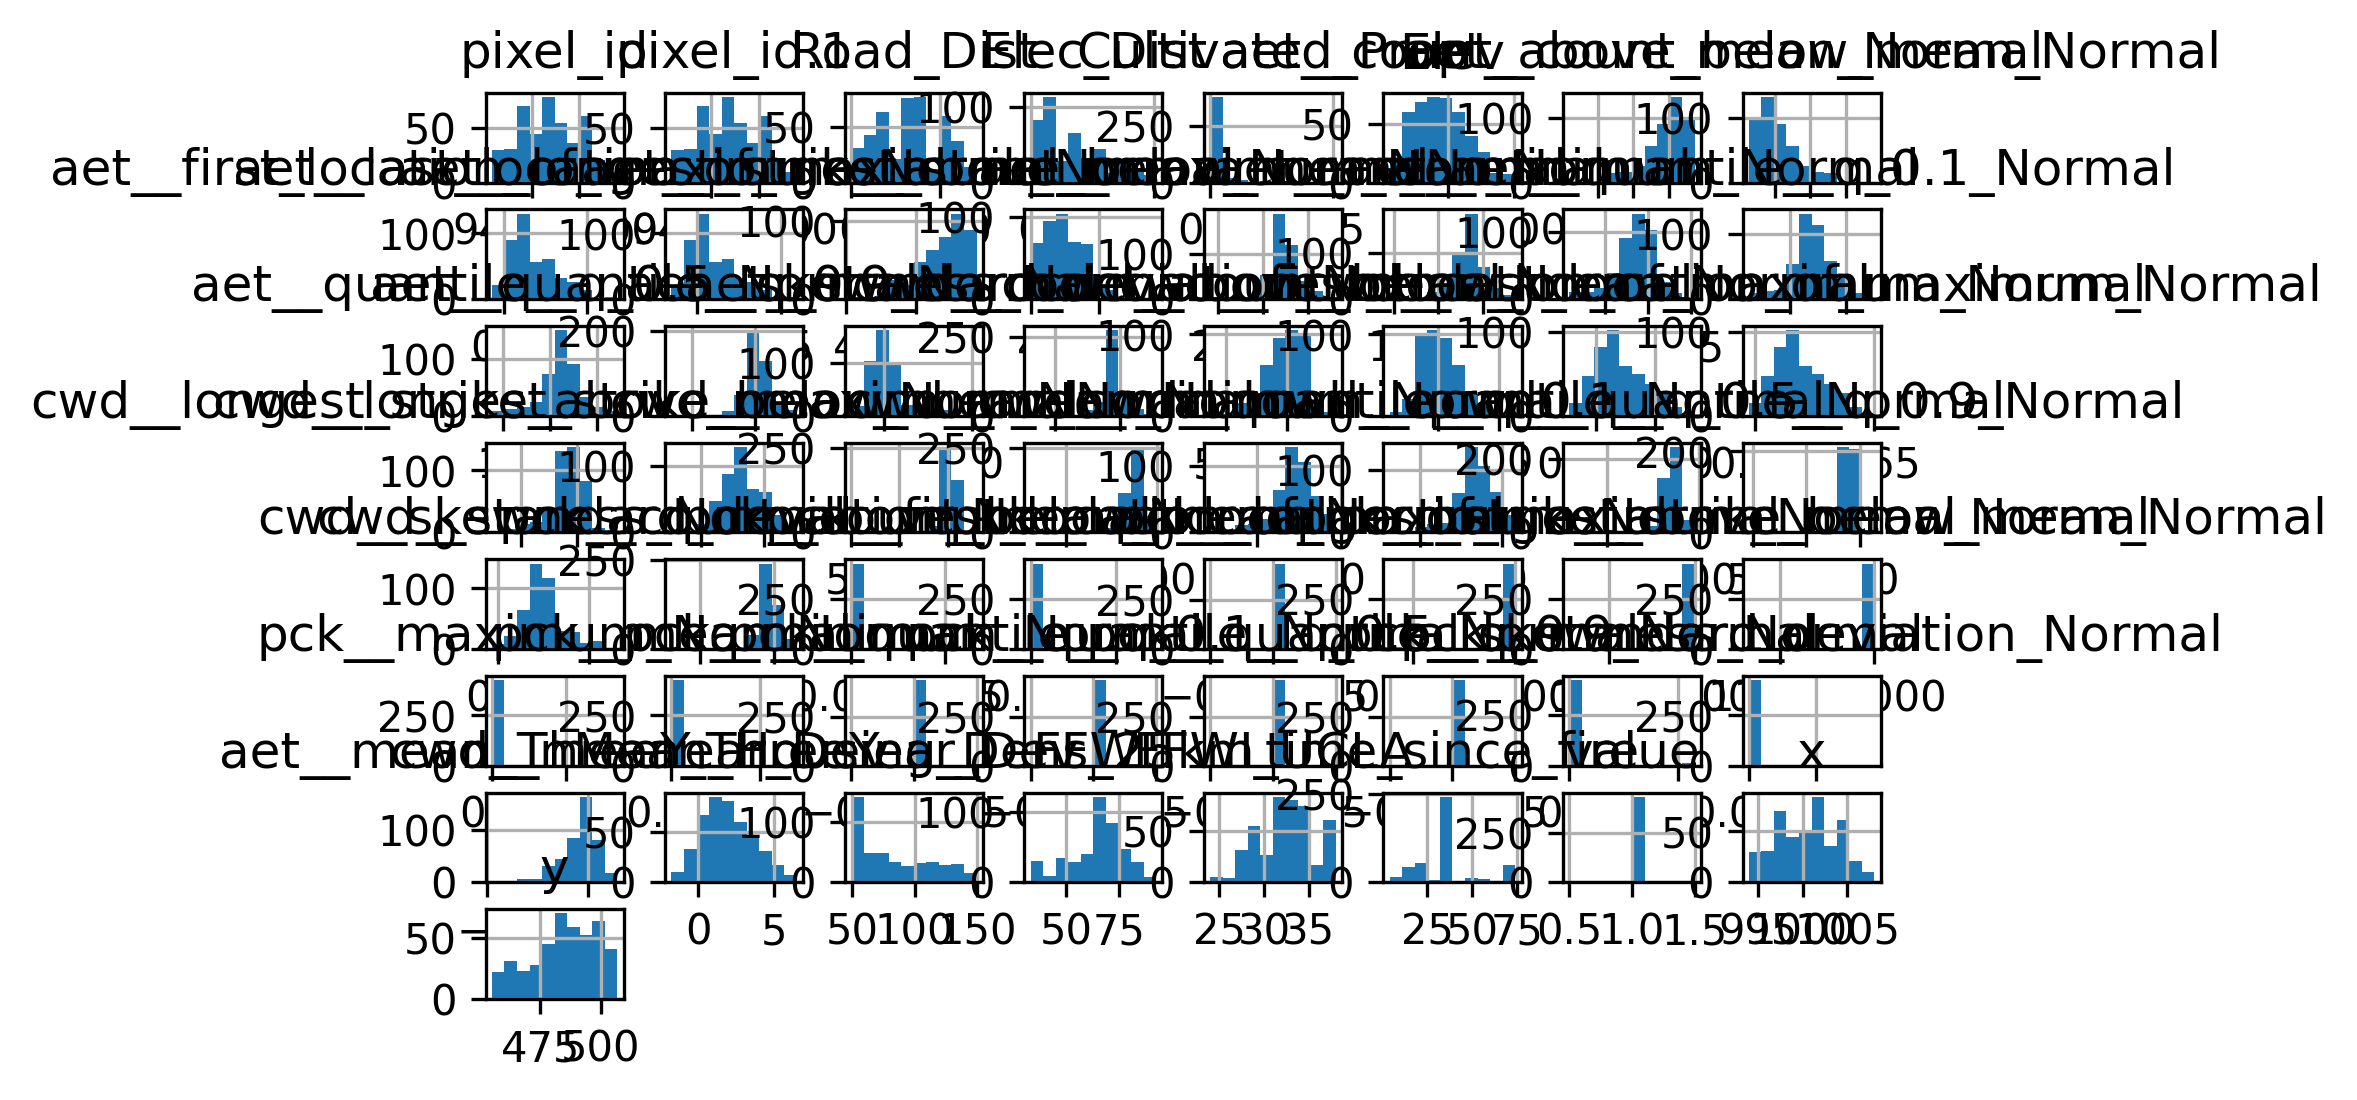

In [133]:
df = fire_events[2003][1]



plt.figure(figsize=(20,20))
df.hist()
plt.savefig('temp.png')

In [ ]:
root_path = Path('')
root_dir

In [121]:
import pickle

f = open('fire_events.pkl', 'wb')

pickle.dump(fire_events, f)
f.close()

In [125]:
with open('/home/capstone22/WildFIrePrediction/PwC-LSTM-Capstone-Project/src/fire_events.pkl', 'rb') as handle:
    temp = pickle.load(handle)
temp[2003][0]

,pixel_id,pixel_id.1,Road_Dist,Elec_Dist,Cultivated_Prop,Elev,time_Normal,aet__count_above_mean_Normal,aet__count_below_mean_Normal,aet__first_location_of_maximum_Normal,...,time,aet__mean_ThreeYear_Dev,cwd__mean_ThreeYear_Dev,Mean_Housing_Dens_25km,FFWI,FFWI_UCLA,time_since_fire,value,x,y
917016,917016,917016,9899.495,11.180340,0.000000,1075.0,195101_198012,5.600000,6.400000,0.336111,...,200001_200212,0.964449,3.897930,13.445194,38.663670,24.0,74.0,1.0,974,482
917956,917956,917956,11313.709,12.369317,0.000000,802.0,195101_198012,5.400000,6.600000,0.344444,...,200001_200212,-3.003607,8.579458,13.545347,30.577866,25.0,74.0,1.0,975,481
917957,917957,917957,10440.307,11.401754,0.000000,963.0,195101_198012,5.433333,6.566667,0.363889,...,200001_200212,-1.309241,6.493035,13.387948,30.577866,24.0,74.0,1.0,975,482
917958,917958,917958,9486.833,10.440307,0.000000,872.0,195101_198012,5.400000,6.600000,0.366667,...,200001_200212,-1.292107,6.052390,13.125430,38.596703,24.0,74.0,1.0,975,483
918889,918889,918889,17000.000,15.000000,0.000000,1040.0,195101_198012,5.400000,6.600000,0.411111,...,200001_200212,-0.192221,5.164177,11.051847,42.667084,27.0,71.0,1.0,976,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934888,934888,934888,0.000,1.000000,0.086948,187.0,195101_198012,5.366667,6.633333,0.383333,...,200001_200212,0.077327,1.979913,43.713940,64.390610,33.0,5.0,1.0,993,475
934889,934889,934889,0.000,0.000000,0.060080,266.0,195101_198012,5.433333,6.566667,0.327778,...,200001_200212,0.403822,1.572834,44.071144,64.390610,36.0,5.0,1.0,993,476
934890,934890,934890,0.000,0.000000,0.007463,338.0,195101_198012,5.633333,6.366667,0.316667,...,200001_200212,0.618610,1.369167,43.896492,62.277573,36.0,5.0,1.0,993,477
934891,934891,934891,0.000,0.000000,0.002033,314.0,195101_198012,5.266667,6.733333,0.305556,...,200001_200212,0.331318,2.165183,44.521164,62.277573,36.0,5.0,1.0,993,478


In [52]:
print(len(all_coords[2003][1]))

435


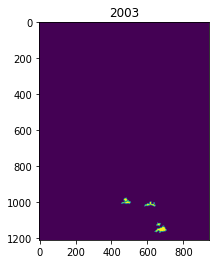

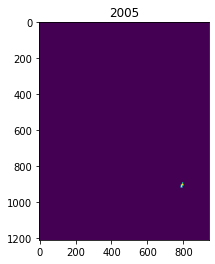

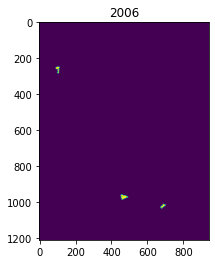

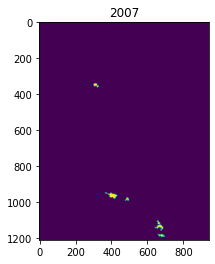

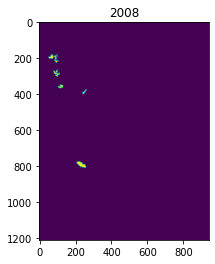

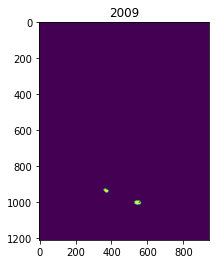

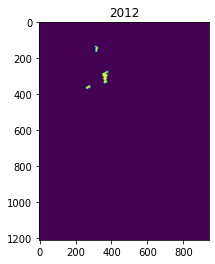

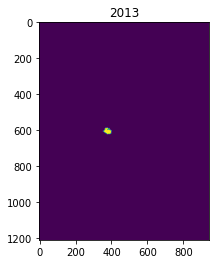

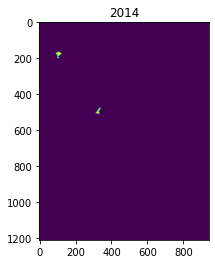

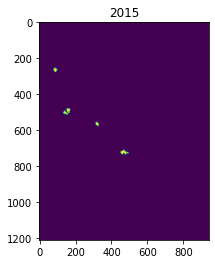

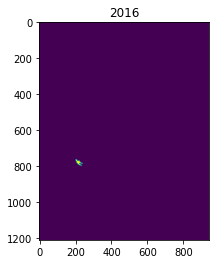

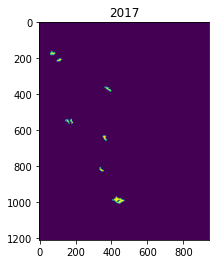

In [95]:
for year, coords in all_coords.items():
#     print(coords)
    
    zeros = np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH))
    
    
    for cs in coords:
        for x, y in cs:
            zeros[x,y] = 1
        
    plt.imshow(zeros)
    plt.title(str(year))
    plt.show()


In [42]:
values, counts = np.unique(all_areas, return_counts=True)
list(zip(values, counts))

[(201, 1),
 (205, 1),
 (224, 1),
 (229, 1),
 (233, 1),
 (243, 1),
 (260, 1),
 (266, 1),
 (286, 1),
 (290, 1),
 (306, 1),
 (314, 1),
 (318, 1),
 (332, 1),
 (342, 1),
 (345, 2),
 (360, 1),
 (362, 1),
 (368, 1),
 (376, 1),
 (379, 1),
 (395, 1),
 (397, 1),
 (401, 1),
 (435, 1),
 (517, 1),
 (522, 1),
 (542, 1),
 (613, 1),
 (622, 1),
 (648, 1),
 (658, 1),
 (831, 1),
 (834, 1),
 (971, 1),
 (976, 1),
 (1032, 1),
 (1103, 1),
 (1144, 1),
 (1281, 1)]

In [94]:
arr = np.arange(0,36)
print(arr)
print(arr.reshape((4,9)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]]
